# **Apple Quality Prediction**

#### Walter Sostene Losa - Filippo Finke

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:


df = pd.read_csv('apple_quality.csv')

## 1. Dataset Description

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [6]:
#Checking for missing values and remove them
print(df.isnull().sum())
df = df.dropna()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [7]:
#Checking for duplicates and remove them
print(df.duplicated().sum())
df = df.drop_duplicates()

0


In [8]:
df.dtypes


A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [10]:
#mapp quality to numerical values
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
df.dtypes


A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object

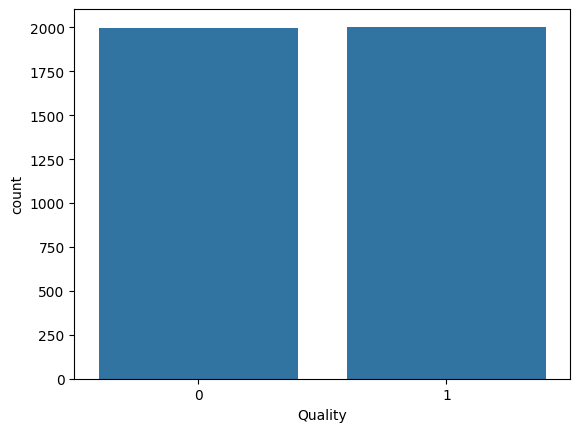

In [23]:
# Print the values of quality in plot
sns.countplot(x='Quality', data=df)
plt.show()




## 2. Dataset Analysis

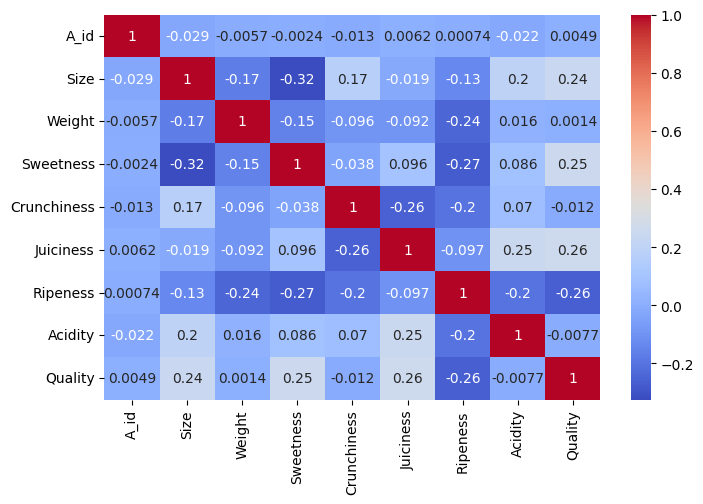

In [16]:
# print correlation matrix and fix dimension
corr = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



In [19]:
# find the most correlated features with the target
corr_target = abs(corr['Quality'])
relevant_features = corr_target[corr_target > 0.1]
relevant_features



Size         0.244007
Sweetness    0.250998
Juiciness    0.260223
Ripeness     0.264315
Quality      1.000000
Name: Quality, dtype: float64

In [20]:
# Train a GridSearchCV model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.drop('Quality', axis=1)
y = df['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_search.predict(X_test)))



Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300)
0.8725017334521986
0.91125
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       401
           1       0.90      0.92      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

